<a href="https://colab.research.google.com/github/Prion6/DSI_ML/blob/main/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [2]:
import seaborn as sb
from string import ascii_letters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder


# Load the example mpg dataset
mpg = sb.load_dataset("mpg")

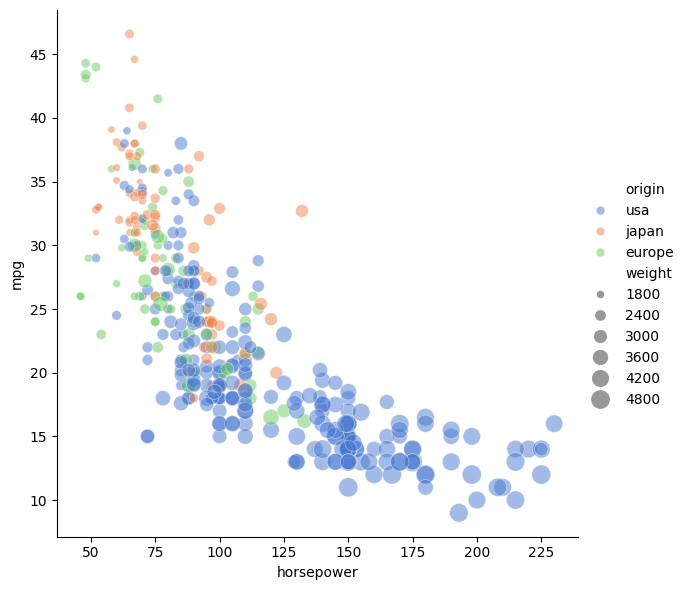

In [3]:



sb.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(20, 200), alpha=.5, palette="muted",
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<Axes: >

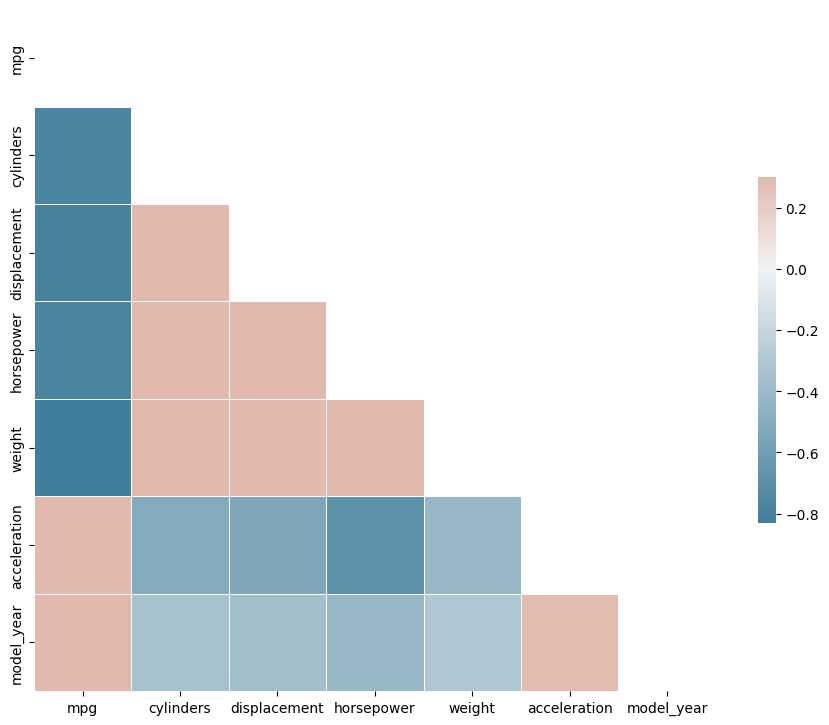

In [4]:
#Select only numeric values, correlation does not work wiht non numeric values
numeric_cols = mpg.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_cols.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})



Do not execute this cell, it works but gives no relevant information as there is no correlation with the additional columns

<Axes: >

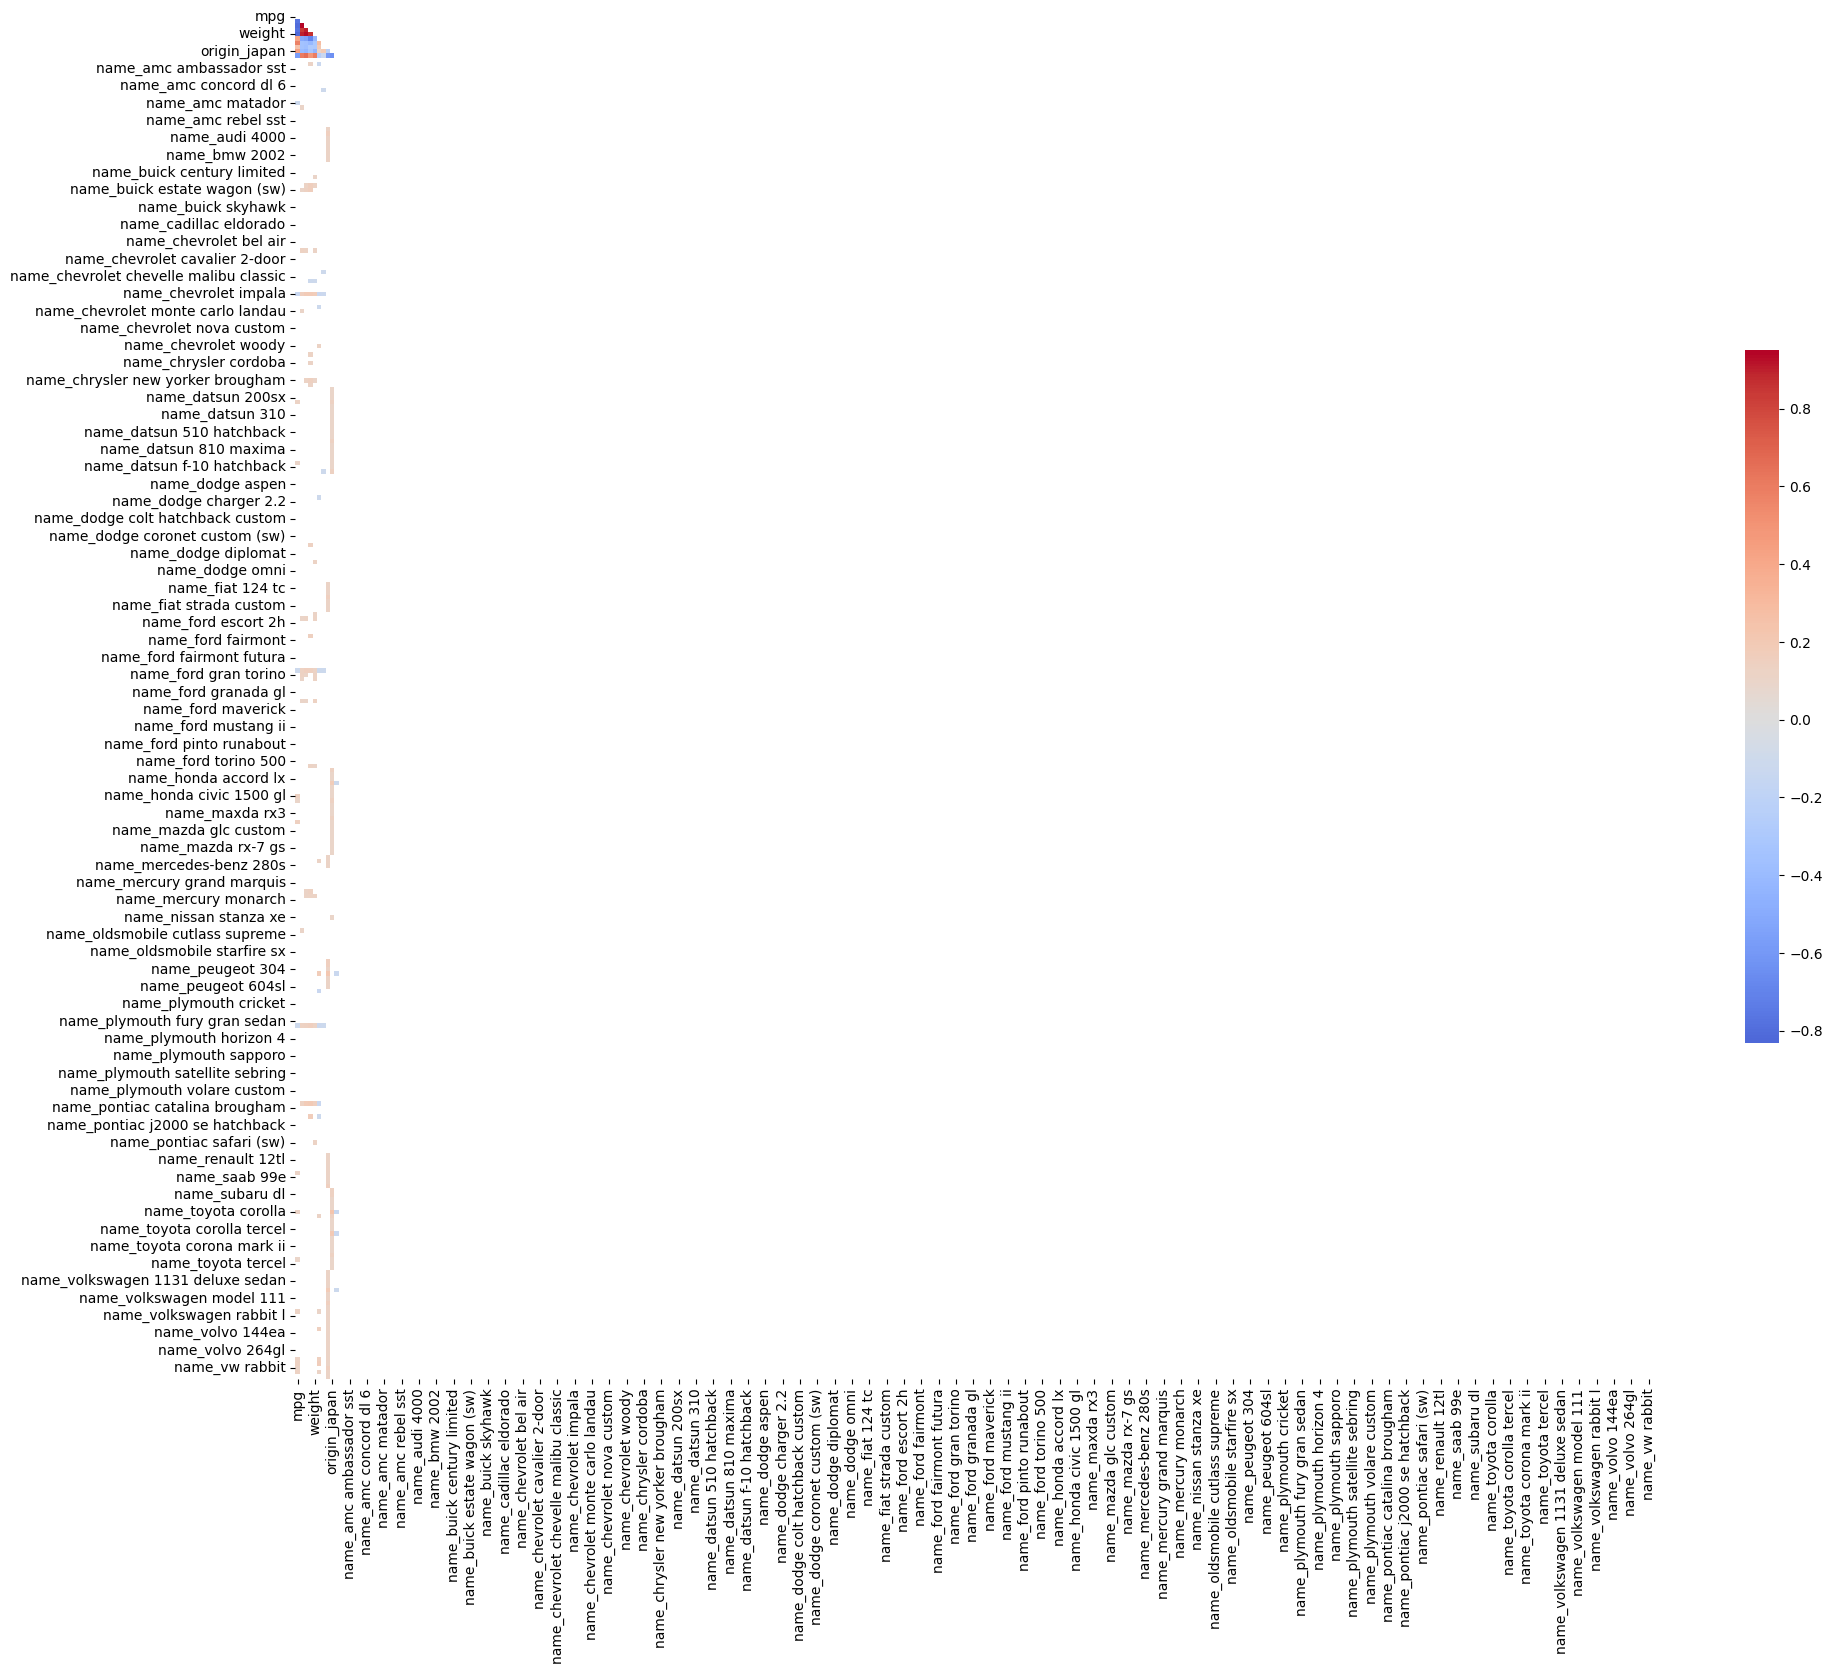

In [5]:

#Select only numeric values, correlation does not work wiht non numeric values
numeric_cols = mpg.select_dtypes(include=['float64', 'int64'])

# Select non-numeric columns
non_numeric_cols = mpg.select_dtypes(exclude=['float64', 'int64'])

# One-hot encode non-numeric columns
encoded_cols = pd.get_dummies(non_numeric_cols)

# Combine encoded columns with numeric columns
mpg_encoded = pd.concat([numeric_cols, encoded_cols], axis = 1)

# Compute the correlation matrix
encoded_corr = mpg_encoded.corr()


# Set the threshold for correlation coefficient
# Adjust this threshold as needed
threshold = 0.1

# Filter the correlation matrix to keep only columns with correlation coefficient >= threshold
filtered_encoded_corr = encoded_corr[abs(encoded_corr) >= threshold]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(filtered_encoded_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(filtered_encoded_corr, mask=mask, cmap='coolwarm', center=0,
           square=True, cbar_kws={"shrink": .5})

3) (1 punto) Construir y entrenar un modelo de regresion lineal


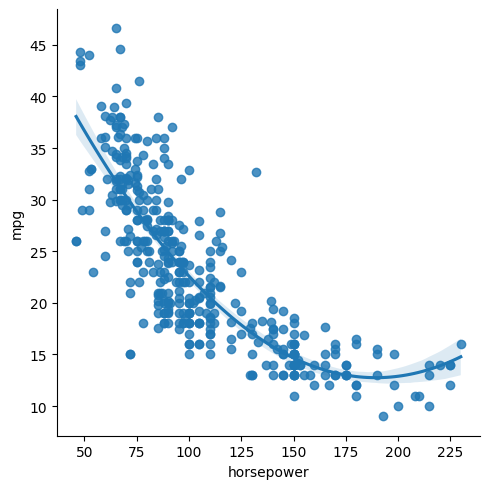

In [6]:
sb.lmplot(x="horsepower", y="mpg", order = 2, data=mpg, palette="muted")

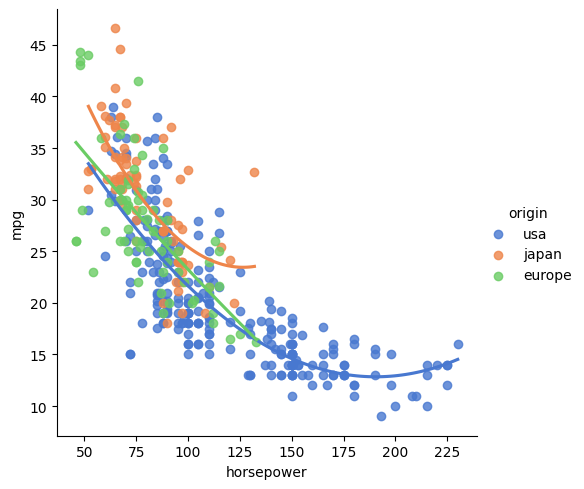

In [7]:
sb.lmplot(x="horsepower", y="mpg", hue="origin", order = 2, ci = None, data=mpg, palette="muted")

In [8]:
#Prepare data for training

mpg_data = mpg.replace('?', pd.NA).dropna()

mpg_data['horsepower'] = mpg_data['horsepower'].astype(float)

X = mpg_data[['horsepower']]

X_train, X_test, y_train, y_test = train_test_split(X, mpg_data.mpg, test_size = 0.2)

Simple Linear Regresion

<Axes: xlabel='horsepower', ylabel='mpg'>

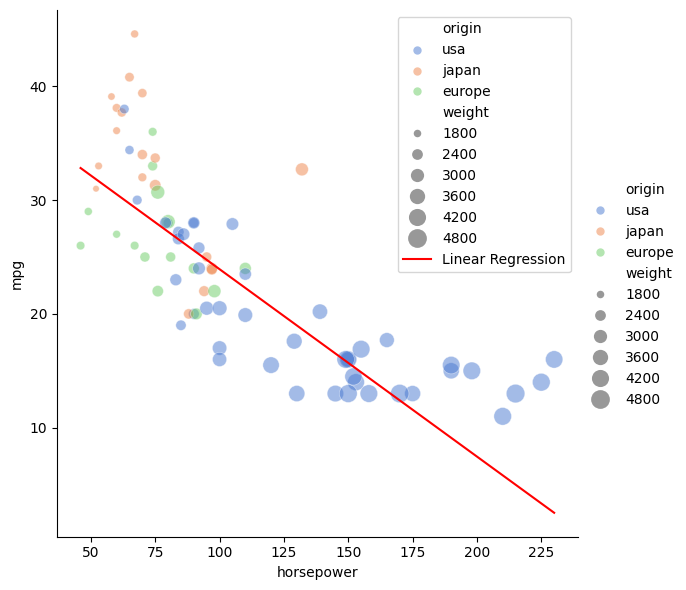

In [9]:
#normal linear regresion

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

sb.relplot(x=X_test['horsepower'], y=y_test, hue="origin", size="weight",
            sizes=(20, 200), alpha=.5, palette="muted",
            height=6, data=mpg)

sb.lineplot(x=X_test['horsepower'], y=y_pred, color='red', label='Linear Regression')


<Axes: xlabel='horsepower', ylabel='mpg'>

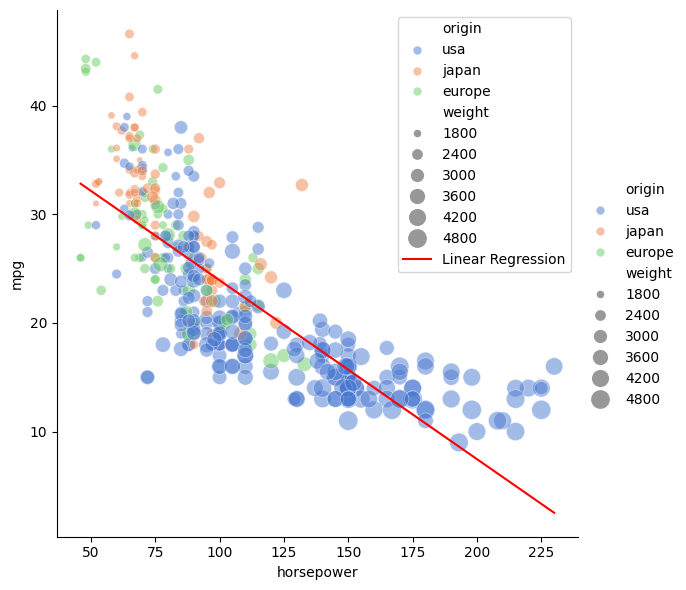

In [10]:
#Normal linear regression across all data

y_pred = linear_reg.predict(X)

sb.relplot(x= mpg_data.horsepower, y= mpg_data.mpg, hue="origin", size="weight",
            sizes=(20, 200), alpha=.5, palette="muted",
            height=6, data=mpg)

sb.lineplot(x=mpg_data.horsepower, y=y_pred, color='red', label='Linear Regression')

Polinomial Linear Regresion

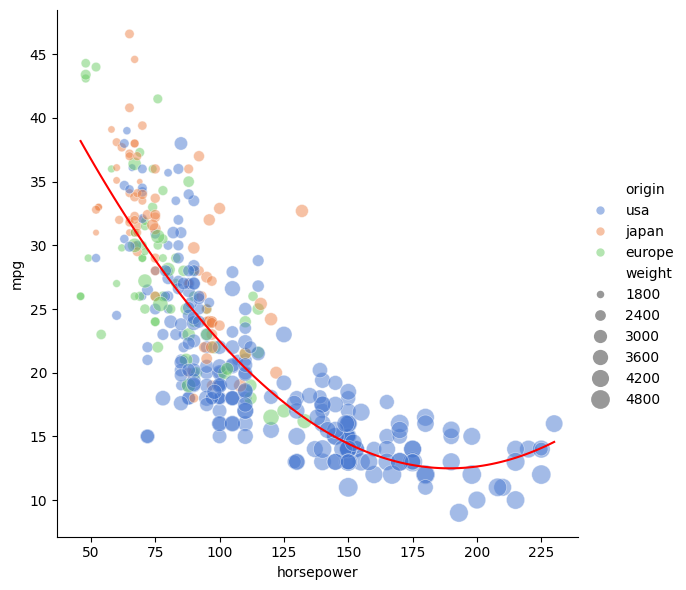

In [11]:
#order 2 linear regression across all data

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

linear_reg_poly = LinearRegression()

linear_reg_poly.fit(X_train_poly, y_train)

plot = sb.relplot(x= X['horsepower'], y= mpg_data.mpg, hue="origin", size="weight",
            sizes=(20, 200), alpha=.5, palette="muted",
            height=6, data=mpg_data)

X_plot = np.linspace(X['horsepower'].min(), X['horsepower'].max(), 100).reshape(-1, 1)

X_plot_df = pd.DataFrame({'horsepower': X_plot.flatten()})

X_plot_poly = poly.transform(X_plot_df)
y_plot = linear_reg_poly.predict(X_plot_poly)
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression (Degree 2)')

plt.show()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [12]:
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 28.817172793044247
R-squared Score: 0.5667213394891577


In [13]:
y_pred_poly = linear_reg_poly.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred_poly)
print("R-squared Score:", r2)

Mean Squared Error: 20.96919558687433
R-squared Score: 0.6847190721615899


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


In [14]:
#Select only numeric values, correlation does not work wiht non numeric values
numeric_cols = mpg.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_cols.corr()

print(corr)

matrix = corr.values

np.fill_diagonal(matrix, 0)

max_abs_index = np.unravel_index(np.argmax(np.abs(matrix)), matrix.shape)

print(max_abs_index)



                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000  
(1, 2)


In [15]:
corr_X = numeric_cols.iloc[:, max_abs_index[0]].values.reshape(-1,1)
corr_Y = numeric_cols.iloc[:, max_abs_index[1]].values

corr_X_train, corr_X_test, corr_y_train, corr_y_test = train_test_split(corr_X, corr_Y, test_size = 0.2)

<Axes: xlabel='Column_X', ylabel='Column_Y'>

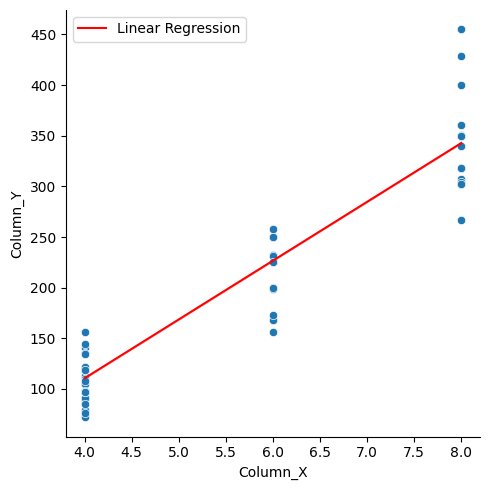

In [16]:
corr_lin_reg = LinearRegression()

corr_lin_reg.fit(corr_X_train, corr_y_train)

corr_y_pred = corr_lin_reg.predict(corr_X_test)

x_plot = pd.DataFrame(corr_X_test, columns=['Column_X'])['Column_X']
y_plot = pd.DataFrame(corr_y_test, columns=['Column_Y'])['Column_Y']

sb.relplot(x=x_plot, y=y_plot, data= mpg)

sb.lineplot(x=x_plot, y=corr_y_pred, color='red', label='Linear Regression')

<Axes: xlabel='Column_X', ylabel='Column_Y'>

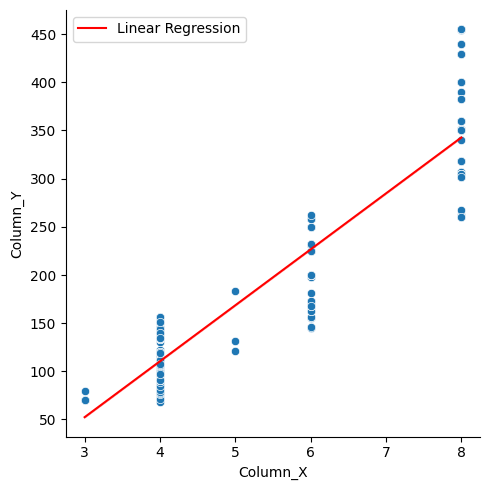

In [17]:
corr_y_pred = corr_lin_reg.predict(corr_X)

x_plot = pd.DataFrame(corr_X, columns=['Column_X'])['Column_X']
y_plot = pd.DataFrame(corr_Y, columns=['Column_Y'])['Column_Y']

sb.relplot(x= x_plot, y= y_plot, data=mpg)

sb.lineplot(x=x_plot, y=corr_y_pred, color='red', label='Linear Regression')


Do not execute this cell, it works but gives no relevant as it does not vary much in shape from regular linear regresion



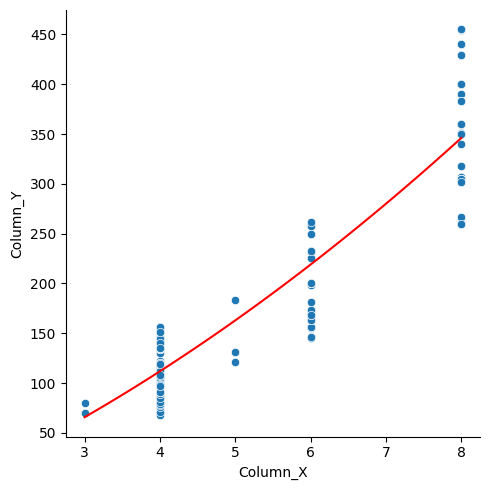

In [18]:
poly = PolynomialFeatures(degree=2)
corr_X_train_poly = poly.fit_transform(corr_X_train)
corr_X_test_poly = poly.transform(corr_X_test)

linear_reg_poly = LinearRegression()

linear_reg_poly.fit(corr_X_train_poly, corr_y_train)


x_plot = pd.DataFrame(corr_X, columns=['Column_X'])['Column_X']
y_plot = pd.DataFrame(corr_Y, columns=['Column_Y'])['Column_Y']

sb.relplot(x= x_plot, y= y_plot, data=mpg)

X_plot = np.linspace(x_plot.min(), x_plot.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = linear_reg_poly.predict(X_plot_poly)
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression (Degree 2)')

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.